In [23]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout
from scikeras.wrappers import KerasRegressor

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [24]:
# Load Dataset
def load_dataset(path):
    return pd.read_csv(path)

In [25]:
# Prepprocess Dataset
def preprocess_dataset(num_cols, cat_cols):
    num_pipe = Pipeline(steps=[
        ('imputer', IterativeImputer()),
        ('scaler', StandardScaler())
    ])
    
    cat_pipe = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
         ('scaler', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    return ColumnTransformer(transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)
    ])


In [26]:
# Create Model function
def create_model(input_shape, layers, activation, dropout_rate, output_size=1, final_activation='linear'):
    model = Sequential()
    for i, layer_size in enumerate(layers):
        if i == 0:
            model.add(Dense(layer_size, input_shape=input_shape, activation=activation))
        else:
            model.add(Dense(layer_size, activation=activation))
        if i < len(layers) - 1:  # Add dropout after all layers except the last hidden layer
            model.add(Dropout(dropout_rate))
            
    model.add(Dense(output_size, activation=final_activation))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [27]:
# Updated Hyperparameter Tuning function
def hyperparameter_tuning(X_train, y_train, input_shape):
    model = KerasRegressor(build_fn=lambda: create_model(input_shape, layers=[128, 64], activation='relu', dropout_rate=0.2))
    param_grid = {
        'batch_size': [12, 32, 64],
        'epochs': [20, 100, 150]
    }
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
    grid_results = grid.fit(X_train, y_train)
    
    # Return the best model and best parameters
    return grid_results.best_estimator_, grid_results.best_params_

In [28]:
# Evaluate Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2


In [29]:
# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    if 'mean_squared_error' in history.history:
        plt.subplot(1, 2, 2)
        plt.plot(history.history['mean_squared_error'], label='MSE')
        plt.title('Model MSE')
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.legend()

    plt.tight_layout()
    plt.show()

In [30]:

# Load Dataset
df = load_dataset('../data/house_data.csv')

# Split features and target
X = df.drop(columns=['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

In [31]:
# Define numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_cols = X.select_dtypes(include=['object']).columns.to_list()


In [32]:
# Prerocess features
preprocessor = preprocess_dataset(num_cols, cat_cols)
X_processed = preprocessor.fit_transform(X)
print(X_processed.shape)

(1460, 196)


In [33]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=0)

In [34]:
# Hyperparameter Tuning
model, best_params = hyperparameter_tuning(X_train, y_train, input_shape=(X_train.shape[1],))

/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error i

2024-03-28 16:39:01.230232: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:01.230251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:01.230256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[

Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/100
Epoch 1/150
Epoch 1/150
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
31/69 [============>.................] - ETA: 0s - loss: 38640508928.0000Epoch 2/20
Epoch 2/20
69/69 [==============================] - 1s 5ms/step - loss: 37890203648.0000
Epoch 2/150
26/26 [==============================] - 0s 6ms/step - loss: 37233577984.0000
Epoch 3/20
69/69 [==============================] - 2s 7ms/step - loss: 39105650688.0000
Epoch 3/150
61/69 [=========================>....] - ETA: 0s - loss: 38880440320.0000Epoch 4/20
Epoch 2/20
28/69 [===========>..................] - ETA: 0s - loss: 36604522496.0000Epoch 2/100
Epoch 3/100
39/69 [===============>..............] - ETA: 0s - loss: 38131073024.0000Epoch 4/20
Epoch 3/100
15/69 [=====>........................] - ETA: 0s - loss: 40923394048.0000Epoch 3/150
Epoch 3/150
69/69 [==============

2024-03-28 16:39:05.537459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


26/26 [==============================] - 0s 4ms/step - loss: 22987098112.0000
Epoch 9/20
69/69 [==============================] - 0s 5ms/step - loss: 10857998336.0000
Epoch 9/150
69/69 [==============================] - 0s 4ms/step - loss: 12265911296.0000
Epoch 18/20
Epoch 9/100
69/69 [==============================] - 0s 4ms/step - loss: 9572260864.0000
Epoch 9/100
26/26 [==============================] - 0s 4ms/step - loss: 17734248448.0000
Epoch 19/20
15/69 [=====>........................] - ETA: 0s - loss: 8238666240.0000Epoch 1/100
Epoch 9/100
69/69 [==============================] - 0s 4ms/step - loss: 6673689088.0000
Epoch 10/20
Epoch 18/20
69/69 [==============================] - 0s 4ms/step - loss: 7399542784.0000
Epoch 8/100
26/26 [==============================] - 0s 5ms/step - loss: 14919751680.0000
Epoch 9/20
 1/69 [..............................] - ETA: 0s - loss: 3829007104.0000Epoch 19/20
Epoch 9/150
26/26 [==============================] - 0s 6ms/step - loss: 12825416

2024-03-28 16:39:05.795478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [817,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:05.796354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]


Epoch 20/20
69/69 [==============================] - 0s 4ms/step - loss: 4251341824.0000
Epoch 18/20
69/69 [==============================] - 0s 4ms/step - loss: 6399858688.0000
Epoch 11/20
 1/26 [>.............................] - ETA: 0s - loss: 18355195904.0000Epoch 19/20
Epoch 10/20
43/69 [=================>............] - ETA: 0s - loss: 4107781632.00000

2024-03-28 16:39:06.142422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:06.243414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]
	 [[{{node Placeholder/_0}}]]


69/69 [==============================] - 0s 5ms/step - loss: 24258238464.0000
Epoch 11/100
Epoch 10/150
7/7 [==============================] - 0s 4ms/step loss: 5058089984.00
Epoch 10/100
69/69 [==============================] - 0s 3ms/step - loss: 4198196224.0000
Epoch 12/100
69/69 [==============================] - 0s 4ms/step - loss: 4572118528.0000
Epoch 8/20
17/69 [======>.......................] - ETA: 0s - loss: 4350213632.0000Epoch 9/100
Epoch 12/150
 1/69 [..............................] - ETA: 0s - loss: 4586706944.0000

/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-28 16:39:06.484856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:06.485237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-pac

69/69 [==============================] - 0s 6ms/step - loss: 3118160896.0000
Epoch 11/20
69/69 [==============================] - 0s 4ms/step - loss: 3363283200.0000
Epoch 9/20
45/69 [==================>...........] - ETA: 0s - loss: 11003214848.0000

/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-28 16:39:06.819602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:06.820208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this 

Epoch 12/150
69/69 [==============================] - 0s 4ms/step - loss: 4595919360.0000
Epoch 12/150
66/69 [===========================>..] - ETA: 0s - loss: 6429647360.0000Epoch 1/100
Epoch 12/150
69/69 [==============================] - 0s 5ms/step - loss: 2370697472.0000
Epoch 13/150
Epoch 14/150
69/69 [==============================] - 0s 4ms/step - loss: 3469992704.0000
Epoch 13/20
69/69 [==============================] - 0s 4ms/step - loss: 2308687360.0000
Epoch 14/20
69/69 [==============================] - 0s 5ms/step - loss: 2552985344.0000
Epoch 14/20
69/69 [==============================] - 0s 5ms/step - loss: 8308169728.0000
Epoch 15/100
69/69 [==============================] - 0s 6ms/step - loss: 2484721152.0000
Epoch 13/100
Epoch 14/150
69/69 [==============================] - 0s 4ms/step - loss: 5246097408.0000
Epoch 14/100
Epoch 12/20
40/69 [================>.............] - ETA: 0s - loss: 2368073472.0000Epoch 2/100
Epoch 15/20
 1/69 [..............................] 

2024-03-28 16:39:10.639756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:10.684529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]


26/26 [==============================] - 0s 5ms/step - loss: 8594693120.0000
Epoch 18/100
69/69 [==============================] - 0s 5ms/step - loss: 1623631360.0000
Epoch 16/100
Epoch 19/100
Epoch 25/100
41/69 [================>.............] - ETA: 0s - loss: 2082047360.0000

/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-28 16:39:11.026017: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:11.026301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-pac

26/26 [==============================] - 0s 5ms/step - loss: 14432261120.0000
Epoch 19/100
Epoch 1/150
26/26 [==============================] - 0s 5ms/step - loss: 6947320320.0000
Epoch 23/100
Epoch 21/100
69/69 [==============================] - 0s 5ms/step - loss: 1642483200.0000
Epoch 22/150
Epoch 22/150
69/69 [==============================] - 0s 5ms/step - loss: 1860709120.0000
Epoch 1/150
46/69 [===================>..........] - ETA: 0s - loss: 1897496192.0000Epoch 21/100
Epoch 20/100
69/69 [==============================] - 0s 5ms/step - loss: 1888825856.0000
Epoch 23/150
69/69 [==============================] - 0s 4ms/step - loss: 1499946112.0000
Epoch 22/100
69/69 [==============================] - 0s 5ms/step - loss: 2276689152.0000
Epoch 23/100
43/69 [=================>............] - ETA: 0s - loss: 1857548928.0000

/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-28 16:39:11.475089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [818,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:11.475332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[{{node Placeholder/_1}}]]


 1/26 [>.............................] - ETA: 0s - loss: 15494627328.0000Epoch 21/100
Epoch 22/100
26/26 [==============================] - 0s 5ms/step - loss: 3725777152.0000
Epoch 24/150
69/69 [==============================] - 0s 4ms/step - loss: 1881101440.0000
Epoch 26/100
69/69 [==============================] - 0s 4ms/step - loss: 1751887104.0000
Epoch 21/100
26/26 [==============================] - 0s 4ms/step - loss: 7926456832.0000
Epoch 20/100
26/26 [==============================] - 0s 4ms/step - loss: 3164484608.0000
Epoch 27/100
Epoch 18/20
26/26 [==============================] - 0s 5ms/step - loss: 13013718016.0000
Epoch 21/100
26/26 [==============================] - 0s 6ms/step - loss: 8503055872.0000
Epoch 23/150
Epoch 23/150
69/69 [==============================] - 0s 4ms/step - loss: 1495846656.0000
Epoch 23/150
69/69 [==============================] - 0s 6ms/step - loss: 1879130880.0000
Epoch 28/100
 1/69 [..............................] - ETA: 1s - loss: 48202921

2024-03-28 16:39:11.943230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]


26/26 [==============================] - 0s 5ms/step - loss: 7433543168.0000
Epoch 22/100
69/69 [==============================] - 0s 5ms/step - loss: 1460066816.0000
Epoch 24/100
26/26 [==============================] - 0s 5ms/step - loss: 5405150208.0000
Epoch 24/100
26/26 [==============================] - 0s 6ms/step - loss: 6095255552.0000


/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-28 16:39:12.287167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [818,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:12.287952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[{{node Placeholder/_1}}]]


26/26 [==============================] - 1s 6ms/step - loss: 39115812864.0000
Epoch 25/100
58/69 [========================>.....] - ETA: 0s - loss: 1704348288.0000Epoch 19/20
Epoch 2/150
69/69 [==============================] - 0s 5ms/step - loss: 1472174080.0000
Epoch 25/100
Epoch 30/100
32/69 [============>.................] - ETA: 0s - loss: 1356070784.0000Epoch 25/150
Epoch 1/150
Epoch 22/100
69/69 [==============================] - 0s 5ms/step - loss: 1637028480.0000
Epoch 26/100
23/26 [=========================>....] - ETA: 0s - loss: 38374453248.0000Epoch 26/150
Epoch 24/100
26/26 [==============================] - 0s 6ms/step - loss: 39104733184.0000
Epoch 26/100
Epoch 3/150
26/26 [==============================] - 1s 7ms/step - loss: 37899079680.0000
Epoch 20/20
Epoch 26/100
 1/26 [>.............................] - ETA: 0s - loss: 33384124416.0000Epoch 23/100
Epoch 25/100
Epoch 26/150
69/69 [==============================] - 0s 4ms/step - loss: 1502153600.0000
Epoch 30/100
32/

2024-03-28 16:39:12.875612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]
	 [[{{node Placeholder/_0}}]]
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


69/69 [==============================] - 0s 5ms/step - loss: 1639949952.0000
Epoch 2/150
26/26 [==============================] - 0s 7ms/step - loss: 37802303488.0000
Epoch 1/150
26/26 [==============================] - 0s 6ms/step - loss: 1936642560.0000
Epoch 5/150
26/26 [==============================] - 0s 5ms/step - loss: 2217400064.0000
Epoch 29/100
Epoch 29/100
Epoch 32/100


2024-03-28 16:39:13.166843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [818,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:13.167236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[{{node Placeholder/_1}}]]


55/69 [======================>.......] - ETA: 0s - loss: 1575940608.0000Epoch 28/150
Epoch 31/100
29/69 [===========>..................] - ETA: 0s - loss: 1415032832.0000Epoch 37/100
Epoch 7/150
26/26 [==============================] - 0s 4ms/step - loss: 37194616832.0000
Epoch 4/150
26/26 [==============================] - 0s 4ms/step - loss: 37834088448.0000
Epoch 32/100
 1/26 [>.............................] - ETA: 0s - loss: 5806066176.0000Epoch 6/150
Epoch 8/150
Epoch 30/100
 1/26 [>.............................] - ETA: 0s - loss: 1210382464.0000Epoch 34/100
Epoch 7/150
26/26 [==============================] - 0s 5ms/step - loss: 1817599488.0000
Epoch 9/150
 1/26 [>.............................] - ETA: 0s - loss: 854315456.0000Epoch 28/100
Epoch 31/100
26/26 [==============================] - 0s 5ms/step - loss: 2170639104.0000
Epoch 32/100
26/26 [==============================] - 0s 5ms/step - loss: 1987943808.0000
Epoch 29/150
Epoch 10/150
69/69 [==============================] 

2024-03-28 16:39:25.468402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]
	 [[{{node Placeholder/_0}}]]


26/26 [==============================] - 0s 5ms/step - loss: 1463353472.0000
Epoch 61/150
26/26 [==============================] - 0s 5ms/step - loss: 1078723712.0000
Epoch 95/100
62/69 [=========================>....] - ETA: 0s - loss: 1139353216.0000Epoch 74/150
Epoch 98/100
26/26 [==============================] - 0s 6ms/step - loss: 1297023488.0000
Epoch 62/150
Epoch 59/100
26/26 [==============================] - 0s 4ms/step - loss: 1130498688.0000
Epoch 54/100
Epoch 52/100
24/26 [==========================>...] - ETA: 0s - loss: 1267756160.0000Epoch 96/100
Epoch 96/100
22/69 [========>.....................] - ETA: 0s - loss: 1039888640.0000

/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-28 16:39:25.922918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [817,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:25.923250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]


13/69 [====>.........................] - ETA: 0s - loss: 1197981696.0000Epoch 99/100
Epoch 52/100
26/26 [==============================] - 0s 4ms/step - loss: 1614080000.0000
Epoch 75/150
26/26 [==============================] - 0s 5ms/step - loss: 1272322688.0000
Epoch 54/100
26/26 [==============================] - 0s 5ms/step - loss: 1385577472.0000
Epoch 97/100
10/69 [===>..........................] - ETA: 0s - loss: 2276616960.0000Epoch 97/100
Epoch 64/150
25/69 [=========>....................] - ETA: 0s - loss: 851801920.0000Epoch 53/100
Epoch 63/150
10/26 [==========>...................] - ETA: 0s - loss: 916733440.0000Epoch 65/150
Epoch 98/100
69/69 [==============================] - 0s 5ms/step - loss: 1350356352.0000
Epoch 60/100
26/26 [==============================] - 0s 5ms/step - loss: 1183198208.0000
Epoch 99/100
69/69 [==============================] - 0s 6ms/step - loss: 1203316992.0000
Epoch 65/150
69/69 [==============================] - 0s 6ms/step - loss: 990009984

2024-03-28 16:39:26.333698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


10/26 [==========>...................] - ETA: 0s - loss: 1255251200.0000Epoch 54/100
Epoch 72/150
7/7 [==============================] - 0s 2ms/step loss: 1437483648.000
Epoch 53/100
69/69 [==============================] - 0s 4ms/step - loss: 1441376512.0000
Epoch 56/150
17/69 [======>.......................] - ETA: 0s - loss: 1016957632.0000Epoch 73/150
Epoch 56/100
Epoch 55/150
 1/26 [>.............................] - ETA: 0s - loss: 951891328.0000Epoch 73/150
Epoch 55/100
18/26 [===================>..........] - ETA: 0s - loss: 1155817856.0000

2024-03-28 16:39:26.575041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:26.575996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:26.745963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]


Epoch 98/100
26/26 [==============================] - 0s 6ms/step - loss: 1430777600.0000
Epoch 57/150
26/26 [==============================] - 0s 6ms/step - loss: 1293624192.0000
Epoch 75/150
26/26 [==============================] - 0s 4ms/step - loss: 1062536064.0000
Epoch 99/100
Epoch 68/150
Epoch 82/150
 7/69 [==>...........................] - ETA: 0s - loss: 826411328.0000 Epoch 75/150
Epoch 58/150
 9/69 [==>...........................] - ETA: 0s - loss: 1012749760.0000

2024-03-28 16:39:26.896548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-28 16:39:27.038694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [818,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:27.039085: I tensorflow/core/co

26/26 [==============================] - 0s 6ms/step - loss: 1261167616.0000
Epoch 76/150
26/26 [==============================] - 0s 5ms/step - loss: 1137827584.0000
Epoch 69/150
69/69 [==============================] - 0s 7ms/step - loss: 1070282240.0000
Epoch 56/150
26/26 [==============================] - 0s 6ms/step - loss: 1353292160.0000
Epoch 77/150
50/69 [====================>.........] - ETA: 0s - loss: 1157138432.0000

/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-28 16:39:27.214182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:27.214784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[{{node Placeholder/_1}}]]


26/26 [==============================] - 0s 5ms/step - loss: 1582602624.0000
Epoch 84/150
26/26 [==============================] - 0s 5ms/step - loss: 1234498048.0000
Epoch 70/150
26/26 [==============================] - 0s 5ms/step - loss: 1509234304.0000
Epoch 71/150
69/69 [==============================] - 0s 4ms/step - loss: 1282295936.0000
Epoch 64/100
26/26 [==============================] - 0s 5ms/step - loss: 1228350976.0000
Epoch 78/150
69/69 [==============================] - 0s 5ms/step - loss: 1203813504.0000
Epoch 57/150
13/13 [==============================] - 2s 8ms/step - loss: 39117168640.0000
Epoch 55/100
 1/69 [..............................] - ETA: 0s - loss: 682254656.0000Epoch 85/150
Epoch 71/150
26/26 [==============================] - 0s 6ms/step - loss: 1441146752.0000
Epoch 2/20
 1/26 [>.............................] - ETA: 0s - loss: 1352657920.0000

2024-03-28 16:39:27.338840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


21/69 [========>.....................] - ETA: 0s - loss: 1168733056.0000Epoch 57/150
Epoch 3/20
 1/26 [>.............................] - ETA: 0s - loss: 611676096.0000Epoch 78/150
Epoch 72/150
50/69 [====================>.........] - ETA: 0s - loss: 996850816.000000

2024-03-28 16:39:27.580211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:27.580569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[{{node Placeholder/_1}}]]


26/26 [==============================] - 0s 5ms/step - loss: 1484163200.0000
Epoch 73/150
69/69 [==============================] - 0s 5ms/step - loss: 1286329600.0000
Epoch 56/100
Epoch 58/150
66/69 [===========================>..] - ETA: 0s - loss: 1209813888.0000Epoch 74/150
Epoch 87/150
 1/26 [>.............................] - ETA: 0s - loss: 575181568.0000Epoch 80/150
Epoch 58/100
26/26 [==============================] - 0s 5ms/step - loss: 1200523392.0000
Epoch 59/150
13/13 [==============================] - 1s 8ms/step - loss: 37899628544.0000
Epoch 81/150
21/69 [========>.....................] - ETA: 0s - loss: 1119661696.0000Epoch 75/150
Epoch 65/100
67/69 [============================>.] - ETA: 0s - loss: 1158896512.0000Epoch 7/20
Epoch 2/20
26/26 [==============================] - 0s 5ms/step - loss: 1215650176.0000
Epoch 74/150
69/69 [==============================] - 0s 6ms/step - loss: 1155799424.0000
Epoch 58/100
13/13 [==============================] - 0s 5ms/step - loss

2024-03-28 16:39:29.536302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]
	 [[{{node Placeholder/_0}}]]
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 61/100
Epoch 8/20
26/26 [==============================] - 0s 5ms/step - loss: 1307184384.0000
Epoch 18/20
Epoch 12/20
Epoch 61/100
13/13 [==============================] - 0s 5ms/step - loss: 34573770752.0000
Epoch 9/20
 1/26 [>.............................] - ETA: 0s - loss: 1132622336.0000Epoch 83/150
Epoch 11/20
54/69 [======================>.......] - ETA: 0s - loss: 1110947712.0000Epoch 82/150
Epoch 90/150
13/13 [==============================] - 0s 5ms/step - loss: 33878831104.0000
Epoch 10/20
36/69 [==============>...............] - ETA: 0s - loss: 1051604672.0000Epoch 20/20
Epoch 95/150
67/69 [============================>.] - ETA: 0s - loss: 1071447744.0000Epoch 14/20
Epoch 91/150
26/26 [==============================] - 0s 5ms/step - loss: 1443924864.0000
Epoch 83/150
13/13 [==============================] - 0s 6ms/step - loss: 36492152832.0000
Epoch 96/150
69/69 [==============================] - 0s 5ms/step - loss: 1097404032.0000
Epoch 65/150
69/69 [================

2024-03-28 16:39:29.793962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:29.794324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:29.881872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]


13/13 [==============================] - 0s 7ms/step - loss: 39324680192.0000
Epoch 12/20
69/69 [==============================] - 0s 5ms/step - loss: 1357706368.0000
Epoch 64/150
13/13 [==============================] - 0s 7ms/step - loss: 37180170240.0000
Epoch 62/100
4/4 [==============================] - 0s 5ms/step loss: 1250127488.00
Epoch 63/150
Epoch 16/20
26/26 [==============================] - 0s 4ms/step - loss: 1365669760.0000
Epoch 85/150
40/69 [================>.............] - ETA: 0s - loss: 1210782848.0000

/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-28 16:39:30.159464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [817,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:30.160117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]


Epoch 98/150
13/13 [==============================] - 0s 6ms/step - loss: 35614797824.0000
Epoch 17/20
Epoch 16/20
Epoch 93/150
15/69 [=====>........................] - ETA: 0s - loss: 1239184000.0000Epoch 18/20
Epoch 15/20
69/69 [==============================] - 0s 5ms/step - loss: 1036632640.0000
Epoch 70/100
 6/13 [============>.................] - ETA: 0s - loss: 35979341824.0000Epoch 63/100
Epoch 94/150
26/26 [==============================] - 0s 6ms/step - loss: 1408139008.0000
Epoch 64/150
Epoch 16/20
Epoch 87/150
69/69 [==============================] - 0s 6ms/step - loss: 1069183104.0000
Epoch 100/150
26/26 [==============================] - 0s 5ms/step - loss: 1224176640.0000
Epoch 94/150
Epoch 18/20
13/13 [==============================] - 0s 6ms/step - loss: 33600894976.0000
Epoch 20/20
58/69 [========================>.....] - ETA: 0s - loss: 1303305728.0000Epoch 64/100
Epoch 62/150
13/13 [==============================] - 0s 8ms/step - loss: 32933158912.0000
Epoch 89/150


2024-03-28 16:39:30.660488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:30.736443: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


 1/69 [..............................] - ETA: 0s - loss: 1145217536.0000Epoch 95/150
Epoch 102/150
 8/26 [========>.....................] - ETA: 0s - loss: 1305026688.0000Epoch 1/100


/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-28 16:39:30.882599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [818,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:30.883226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:30.963363: I tensorflow/core/common

26/26 [==============================] - 0s 5ms/step - loss: 1276971648.0000
Epoch 97/150
69/69 [==============================] - 0s 4ms/step - loss: 1119004544.0000
Epoch 64/100
26/26 [==============================] - 0s 4ms/step - loss: 1216934656.0000
Epoch 67/150
 1/69 [..............................] - ETA: 0s - loss: 1410613888.0000Epoch 1/100


/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-28 16:39:31.165418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [818,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:31.165858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[{{node Placeholder/_1}}]]


33/69 [=============>................] - ETA: 0s - loss: 1158550912.0000Epoch 98/150
Epoch 97/150
 1/26 [>.............................] - ETA: 0s - loss: 1114732544.0000Epoch 67/100
Epoch 66/150
26/26 [==============================] - 0s 5ms/step - loss: 1033777088.0000
Epoch 107/150
22/69 [========>.....................] - ETA: 0s - loss: 1119056768.0000Epoch 92/150
Epoch 5/100
69/69 [==============================] - 0s 4ms/step - loss: 1190084480.0000
Epoch 65/150
Epoch 66/100
26/26 [==============================] - 0s 4ms/step - loss: 1132320000.0000
Epoch 66/100
Epoch 101/150
10/69 [===>..........................] - ETA: 0s - loss: 714911040.0000Epoch 67/150
Epoch 94/150
13/13 [==============================] - 0s 7ms/step - loss: 39093805056.0000
Epoch 99/150
24/26 [==========================>...] - ETA: 0s - loss: 1072105280.0000Epoch 2/100
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 1347345152.0000
Epoch 108/150
69/69 [===========================

2024-03-28 16:39:40.349929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]
	 [[{{node Placeholder/_0}}]]
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


13/13 [==============================] - 0s 6ms/step - loss: 2086472832.0000
Epoch 88/100
26/26 [==============================] - 0s 6ms/step - loss: 1236086784.0000
Epoch 65/100
13/13 [==============================] - 0s 12ms/step - loss: 1520720256.0000
Epoch 83/100
13/13 [==============================] - ETA: 0s - loss: 1575753344.0000

2024-03-28 16:39:40.559279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:40.559979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]


26/26 [==============================] - 0s 5ms/step - loss: 1164718976.0000
Epoch 88/150
26/26 [==============================] - 0s 5ms/step - loss: 1065616896.0000
Epoch 145/150
13/13 [==============================] - 0s 5ms/step - loss: 1776093184.0000
Epoch 80/100
13/13 [==============================] - 0s 7ms/step - loss: 2070799104.0000
Epoch 75/100
26/26 [==============================] - 0s 5ms/step - loss: 1163074944.0000
Epoch 146/150
Epoch 87/150
26/26 [==============================] - 0s 6ms/step - loss: 1283358848.0000
Epoch 89/100
13/13 [==============================] - 0s 12ms/step - loss: 1727538304.0000
Epoch 145/150
 9/13 [===================>..........] - ETA: 0s - loss: 2494977792.0000Epoch 147/150
Epoch 81/100
Epoch 137/150
26/26 [==============================] - 0s 5ms/step - loss: 1055143872.0000
Epoch 77/100
26/26 [==============================] - 0s 5ms/step - loss: 1213851264.0000
Epoch 146/150
Epoch 82/100
 8/13 [=================>............] - ETA: 

2024-03-28 16:39:41.675896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:41.841660: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]
	 [[{{node Placeholder/_0}}]]
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 83/100
69/69 [==============================] - 0s 3ms/step - loss: 953842368.0000
Epoch 142/150
19/26 [====================>.........] - ETA: 0s - loss: 1144053504.0000Epoch 88/100
Epoch 74/100
Epoch 91/150
Epoch 97/100
13/13 [==============================] - 0s 7ms/step - loss: 1626043776.0000
Epoch 89/100
 7/13 [===============>..............] - ETA: 0s - loss: 1691991168.0000Epoch 98/100
Epoch 90/100
13/13 [==============================] - 0s 5ms/step - loss: 1649566848.0000


2024-03-28 16:39:41.927080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [817,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:41.927855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [817]
	 [[{{node Placeholder/_1}}]]
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


7/7 [==============================] - 0s 2ms/step loss: 1901331456.00
Epoch 86/100
69/69 [==============================] - 0s 3ms/step - loss: 1231545728.0000
Epoch 150/150
11/26 [===========>..................] - ETA: 0s - loss: 1347052160.0000Epoch 96/100
Epoch 85/100
10/13 [======================>.......] - ETA: 0s - loss: 1755953536.0000Epoch 92/150
Epoch 87/100
26/26 [==============================] - 0s 6ms/step - loss: 1120993792.0000
Epoch 100/100
24/69 [=========>....................] - ETA: 0s - loss: 1575037056.0000Epoch 88/100
Epoch 88/150
32/69 [============>.................] - ETA: 0s - loss: 984724992.0000Epoch 77/100


2024-03-28 16:39:42.136658: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:42.245976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:39:42.246560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]


Epoch 89/150
11/69 [===>..........................] - ETA: 0s - loss: 771612672.0000Epoch 3/150
Epoch 91/100
63/69 [==========================>...] - ETA: 0s - loss: 1140699904.0000Epoch 1/150
Epoch 78/100
13/13 [==============================] - 0s 6ms/step - loss: 1691176064.0000
Epoch 87/100
 1/69 [..............................] - ETA: 0s - loss: 2387693568.0000Epoch 89/100
Epoch 92/100
11/69 [===>..........................] - ETA: 0s - loss: 864383296.0000 Epoch 4/150
Epoch 145/150
51/69 [=====================>........] - ETA: 0s - loss: 996984064.0000 Epoch 87/100
Epoch 90/150
13/13 [==============================] - 0s 6ms/step - loss: 1659289472.0000
Epoch 90/100
69/69 [==============================] - 0s 4ms/step - loss: 1051444608.0000
Epoch 88/100
 1/13 [=>............................] - ETA: 0s - loss: 1373913216.0000

2024-03-28 16:39:42.431699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [818,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:42.432524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [818]
	 [[{{node Placeholder/_1}}]]
/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-28 16:39:42.545980: I tensorflow/core/common

69/69 [==============================] - 0s 6ms/step - loss: 1357493120.0000
Epoch 94/100
13/13 [==============================] - 0s 5ms/step - loss: 1310532992.0000
Epoch 90/150
Epoch 1/150
69/69 [==============================] - 0s 4ms/step - loss: 1200879232.0000
Epoch 91/150
13/13 [==============================] - 0s 5ms/step - loss: 1752815232.0000
Epoch 92/100
13/13 [==============================] - 0s 6ms/step - loss: 1493472768.0000
Epoch 7/150
Epoch 96/100
69/69 [==============================] - 0s 5ms/step - loss: 1089021952.0000
Epoch 89/100
13/13 [==============================] - 0s 6ms/step - loss: 1748245760.0000
Epoch 83/100
69/69 [==============================] - 0s 4ms/step - loss: 1172533632.0000
Epoch 97/100
 1/13 [=>............................] - ETA: 0s - loss: 1511515136.0000Epoch 98/100
Epoch 92/100
13/13 [==============================] - 0s 6ms/step - loss: 1478229632.0000
Epoch 94/100
13/13 [==============================] - 0s 7ms/step - loss: 3891772

2024-03-28 16:39:43.215153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 0s 5ms/step - loss: 1559330048.0000
Epoch 100/100
Epoch 95/150
 1/13 [=>............................] - ETA: 0s - loss: 2675134976.0000Epoch 96/150
Epoch 13/150
 1/13 [=>............................] - ETA: 19s - loss: 40972808192.0000

2024-03-28 16:39:43.461519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:43.531825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]


37/69 [===============>..............] - ETA: 0s - loss: 990548032.0000 Epoch 14/150
Epoch 98/100
 1/13 [=>............................] - ETA: 0s - loss: 1083654656.0000Epoch 90/100
Epoch 91/100
13/13 [==============================] - 2s 7ms/step - loss: 37899628544.0000
Epoch 2/150
7/7 [==============================] - 0s 3ms/step
Epoch 91/100
4/4 [==============================] - 0s 3ms/step
Epoch 99/100
13/13 [==============================] - 0s 5ms/step - loss: 37897420800.0000
Epoch 3/150
 1/13 [=>............................] - ETA: 14s - loss: 37004001280.0000Epoch 91/150
Epoch 15/150
69/69 [==============================] - 0s 5ms/step - loss: 1001569792.0000


2024-03-28 16:39:43.691879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 0s 7ms/step - loss: 1361455616.0000
Epoch 100/100
13/13 [==============================] - 0s 6ms/step - loss: 37248212992.0000
Epoch 2/150
53/69 [======================>.......] - ETA: 0s - loss: 980175680.0000Epoch 16/150
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 37230755840.0000
Epoch 94/150
13/13 [==============================] - 0s 7ms/step - loss: 1455173632.0000
Epoch 4/150
69/69 [==============================] - 0s 4ms/step - loss: 1056979776.0000
Epoch 91/100
13/13 [==============================] - 0s 6ms/step - loss: 39911362560.0000
Epoch 17/150
Epoch 3/150
15/17 [=========================>....] - ETA: 0sEpoch 94/100
Epoch 4/150
49/69 [====================>.........] - ETA: 0s - loss: 962061120.0000Epoch 95/100
Epoch 5/150
 8/13 [=================>............] - ETA: 0s - loss: 34909548544.0000

2024-03-28 16:39:43.916180: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]


21/69 [========>.....................] - ETA: 0s - loss: 762823296.0000Epoch 6/150
Epoch 5/150
Epoch 4/150
13/13 [==============================] - 0s 7ms/step - loss: 39889350656.0000
Epoch 6/150
22/69 [========>.....................] - ETA: 0s - loss: 839069376.0000Epoch 7/150
Epoch 5/150
55/69 [======================>.......] - ETA: 0s - loss: 1154909056.0000Epoch 7/150
Epoch 20/150
69/69 [==============================] - 0s 7ms/step - loss: 1316296320.0000
Epoch 98/100
13/13 [==============================] - 0s 6ms/step - loss: 37108592640.0000
Epoch 8/150
69/69 [==============================] - 0s 6ms/step - loss: 1048520384.0000
Epoch 21/150
37/69 [===============>..............] - ETA: 0s - loss: 966251648.0000Epoch 8/150
Epoch 93/100
13/13 [==============================] - 0s 5ms/step - loss: 1543467776.0000
Epoch 99/100
13/13 [==============================] - 0s 6ms/step - loss: 39818448896.0000
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 3345

2024-03-28 16:39:44.538934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 0s 8ms/step - loss: 39074521088.0000
Epoch 93/100
13/13 [==============================] - 0s 5ms/step - loss: 31592085504.0000
Epoch 10/150
13/13 [==============================] - 0s 7ms/step - loss: 36586975232.0000
Epoch 12/150
 1/69 [..............................] - ETA: 0s - loss: 408307104.0000Epoch 12/150
Epoch 25/150
13/13 [==============================] - 0s 6ms/step - loss: 36350926848.0000
Epoch 94/150
43/69 [=================>............] - ETA: 0s - loss: 1077750912.0000Epoch 13/150
Epoch 11/150
59/69 [========================>.....] - ETA: 0s - loss: 965964608.0000 Epoch 13/150
Epoch 26/150
38/69 [===============>..............] - ETA: 0s - loss: 1183537280.0000Epoch 96/100
Epoch 96/150
13/13 [==============================] - 0s 6ms/step - loss: 38500556800.0000
Epoch 92/100
61/69 [=========================>....] - ETA: 0s - loss: 1037849856.0000Epoch 14/150
Epoch 15/150
Epoch 14/150
13/13 [==============================] - 0s

2024-03-28 16:39:47.090860: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - ETA: 0s - loss: 15164382208.0000Epoch 35/150
Epoch 51/150
13/13 [==============================] - 0s 5ms/step - loss: 15164382208.0000
Epoch 37/150
18/18 [==============================] - 0s 3ms/steposs: 1115468928.00
Epoch 37/150
Epoch 106/150
69/69 [==============================] - 0s 4ms/step - loss: 1121374464.0000
Epoch 37/150
Epoch 102/150
44/69 [==================>...........] - ETA: 0s - loss: 760705856.0000Epoch 38/150
Epoch 52/150
13/13 [==============================] - 0s 5ms/step - loss: 13869723648.0000
Epoch 38/150
13/13 [==============================] - 0s 5ms/step - loss: 9767410688.0000
Epoch 53/150
Epoch 39/150
 1/13 [=>............................] - ETA: 0s - loss: 6794856960.0000

2024-03-28 16:39:47.336440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:47.358439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 0s 5ms/step - loss: 10075076608.0000
Epoch 103/150
17/17 [==============================] - 0s 2ms/steposs: 2937108992.00
Epoch 40/150
13/13 [==============================] - 0s 6ms/step - loss: 2747254784.0000
Epoch 55/150
69/69 [==============================] - 0s 4ms/step - loss: 910807488.0000
Epoch 38/150
13/13 [==============================] - 0s 10ms/step - loss: 9104468992.0000
Epoch 40/150
 1/13 [=>............................] - ETA: 0s - loss: 1905934848.0000Epoch 103/150
Epoch 39/150
63/69 [==========================>...] - ETA: 0s - loss: 1119094912.0000Epoch 41/150
Epoch 106/150
13/13 [==============================] - 0s 5ms/step - loss: 9215381504.0000
Epoch 40/150
69/69 [==============================] - 0s 4ms/step - loss: 918936640.0000
Epoch 42/150
26/69 [==========>...................] - ETA: 0s - loss: 871113344.0000Epoch 41/150
Epoch 108/150
13/13 [==============================] - 0s 6ms/step - loss: 7041171968.0000
Ep

2024-03-28 16:39:48.205812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 0s 4ms/step - loss: 5797681152.0000
Epoch 46/150
Epoch 47/150
13/13 [==============================] - 0s 6ms/step - loss: 1920239616.0000
Epoch 63/150
69/69 [==============================] - 0s 4ms/step - loss: 990695616.0000
Epoch 48/150
17/17 [==============================] - 0s 1ms/step
Epoch 48/150
13/13 [==============================] - 0s 5ms/step - loss: 4503244800.0000
Epoch 49/150
13/13 [==============================] - 0s 4ms/step - loss: 3492605952.0000
Epoch 48/150
10/13 [======================>.......] - ETA: 0s - loss: 2822211584.0000Epoch 48/150
Epoch 109/150
13/13 [==============================] - 0s 5ms/step - loss: 2023724928.0000
Epoch 65/150
13/13 [==============================] - 0s 6ms/step - loss: 4290644736.0000
Epoch 49/150
13/13 [==============================] - 0s 5ms/step - loss: 2717889792.0000
Epoch 107/150
69/69 [==============================] - 0s 3ms/step - loss: 1013134080.0000
Epoch 51/150
69/69 [=====

2024-03-28 16:39:56.296785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]
	 [[{{node Placeholder/_0}}]]


69/69 [==============================] - 0s 4ms/step - loss: 1240526720.0000
Epoch 140/150
13/13 [==============================] - 0s 7ms/step - loss: 1264549888.0000
Epoch 135/150
15/69 [=====>........................] - ETA: 0s - loss: 1082917888.0000Epoch 143/150
Epoch 137/150
13/13 [==============================] - 0s 5ms/step - loss: 1278428672.0000
Epoch 142/150
13/13 [==============================] - 0s 5ms/step - loss: 1351744384.0000
Epoch 144/150
69/69 [==============================] - 0s 4ms/step - loss: 954284992.0000
Epoch 137/150
69/69 [==============================] - 0s 4ms/step - loss: 994009728.0000
Epoch 145/150
44/69 [==================>...........] - ETA: 0s - loss: 886817344.0000Epoch 137/150
Epoch 138/150
13/13 [==============================] - 0s 6ms/step - loss: 1462804096.0000
Epoch 142/150
69/69 [==============================] - 0s 4ms/step - loss: 1207198080.0000
Epoch 144/150
 1/69 [..............................] - ETA: 1s - loss: 2139576192.0000Epo

2024-03-28 16:39:57.105786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:57.177547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]
	 [[{{node Placeholder/_0}}]]


69/69 [==============================] - 0s 3ms/step - loss: 1196854272.0000
Epoch 138/150
13/13 [==============================] - 0s 4ms/step - loss: 1377174784.0000
Epoch 146/150
13/13 [==============================] - 0s 4ms/step - loss: 1165626112.0000
Epoch 150/150
13/13 [==============================] - 0s 4ms/step - loss: 1427727360.0000
Epoch 147/150
 1/69 [..............................] - ETA: 0s - loss: 1302564864.0000

2024-03-28 16:39:57.374640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]


69/69 [==============================] - 0s 3ms/step - loss: 1282936320.0000
Epoch 139/150
13/13 [==============================] - 0s 5ms/step - loss: 1394605952.0000
Epoch 149/150
69/69 [==============================] - 0s 3ms/step - loss: 867805632.0000
Epoch 141/150
Epoch 142/150
53/69 [======================>.......] - ETA: 0s - loss: 971079296.0000 

2024-03-28 16:39:57.589515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]


69/69 [==============================] - 0s 3ms/step - loss: 929198144.0000
Epoch 142/150
69/69 [==============================] - 0s 3ms/step - loss: 965676864.0000
Epoch 143/150
69/69 [==============================] - 0s 3ms/step - loss: 1039295360.0000
Epoch 139/150
Epoch 142/150
69/69 [==============================] - 0s 3ms/step - loss: 925977536.0000
Epoch 143/150
69/69 [==============================] - 0s 3ms/step - loss: 1174227712.0000
Epoch 141/150
69/69 [==============================] - 0s 3ms/step - loss: 1003972416.0000
Epoch 140/150
69/69 [==============================] - 0s 2ms/step - loss: 857879872.0000
Epoch 144/150
69/69 [==============================] - 0s 3ms/step - loss: 875862912.0000
Epoch 141/150
Epoch 144/150
69/69 [==============================] - 0s 2ms/step - loss: 943247616.0000
Epoch 145/150
69/69 [==============================] - 0s 3ms/step - loss: 1149981440.0000
Epoch 143/150
69/69 [==============================] - 0s 2ms/step - loss: 9498545

2024-03-28 16:39:59.197659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]
	 [[{{node Placeholder/_0}}]]


69/69 [==============================] - 0s 2ms/step - loss: 1058389568.0000
Epoch 147/150
69/69 [==============================] - 0s 2ms/step - loss: 1114566784.0000
Epoch 150/150
69/69 [==============================] - 0s 2ms/step - loss: 1027645888.0000
Epoch 149/150
69/69 [==============================] - 0s 2ms/step - loss: 1021004416.0000
Epoch 148/150
52/69 [=====================>........] - ETA: 0s - loss: 1177800192.0000

2024-03-28 16:39:59.430088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [205,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:59.442588: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]


69/69 [==============================] - 0s 2ms/step - loss: 1155702272.0000
Epoch 150/150
69/69 [==============================] - 0s 2ms/step - loss: 1056863360.0000
Epoch 149/150
32/69 [============>.................] - ETA: 0s - loss: 1225907584.0000

2024-03-28 16:39:59.634477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]
2024-03-28 16:39:59.829668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [204,3]
	 [[{{node Placeholder/_0}}]]


69/69 [==============================] - 0s 2ms/step - loss: 1041535552.0000
Epoch 150/150
17/17 [==============================] - 0s 2ms/step
Epoch 1/150


/home/jparep/anaconda3/envs/tfenv/lib/python3.9/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2024-03-28 16:39:59.983342: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-03-28 16:40:00.078963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1022]
	 [[{{node Placeholder/_1}}]]
2024-03-28 16:40:00.079194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this messa

86/86 [==============================] - 2s 12ms/step - loss: 38688337920.0000
Epoch 2/150
86/86 [==============================] - 0s 3ms/step - loss: 38271741952.0000
Epoch 3/150
86/86 [==============================] - 0s 2ms/step - loss: 36395106304.0000
Epoch 4/150
86/86 [==============================] - 0s 4ms/step - loss: 32070823936.0000
Epoch 5/150
86/86 [==============================] - 0s 5ms/step - loss: 25278224384.0000
Epoch 6/150
86/86 [==============================] - 0s 4ms/step - loss: 17040730112.0000
Epoch 7/150
86/86 [==============================] - 0s 4ms/step - loss: 9720458240.0000
Epoch 8/150
86/86 [==============================] - 0s 3ms/step - loss: 5362681344.0000
Epoch 9/150
86/86 [==============================] - 0s 2ms/step - loss: 3365274112.0000
Epoch 10/150
86/86 [==============================] - 0s 5ms/step - loss: 2758814720.0000
Epoch 11/150
86/86 [==============================] - 0s 5ms/step - loss: 2376113664.0000
Epoch 12/150
86/86 [====

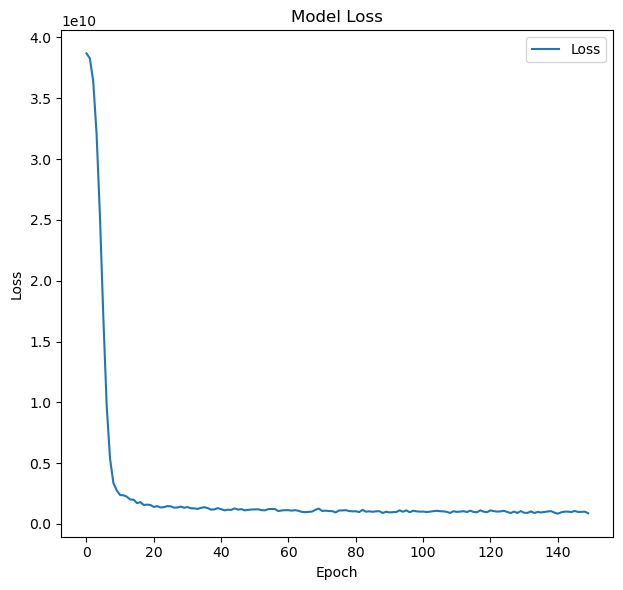

In [36]:
# Plot Training History
history = model.model_.history
plot_training_history(history)

In [ ]:
print(best_params)
print(model.model_.summary())

In [37]:
# Evaluate Model
mse, r2 = evaluate_model(model, X_test, y_test)
print(f' Test MSE: {mse:.2f}')
print(f'Test R2: {r2:.2f}')

 1/37 [..............................] - ETA: 7s

2024-03-28 16:41:53.407576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [438,3]
	 [[{{node Placeholder/_0}}]]


37/37 [==============================] - 1s 21ms/step
 Test MSE: 1675739115.00
Test R2: 0.75
